# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [71]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [72]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] - 273.15 # converting Kelvin to Celsius
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | aasiaat
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | arkhangel'sk
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | sisimiut
Processing Record 9 of Set 1 | sesheke
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | dakhla
Processing Record 12 of Set 1 | keffi
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | amasra
Processing Record 16 of Set 1 | glendive
Processing Record 17 of Set 1 | coahuayana de hidalgo
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | west island
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 

In [73]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [74]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,24.19,92,100,2.24,EC,1691585649
1,aasiaat,68.7098,-52.8699,4.68,76,91,1.46,GL,1691585650
2,olonkinbyen,70.9221,-8.7187,5.93,97,100,7.84,SJ,1691585650
3,edinburgh of the seven seas,-37.0676,-12.3116,11.74,57,74,8.35,SH,1691585650
4,arkhangel'sk,64.5401,40.5433,26.26,38,2,2.89,RU,1691585650


In [75]:
# Export the City_Data into a csv
city_data_df.to_csv("../output/cities.csv", index_label="City_ID")

In [76]:
# Read saved data
city_data_df = pd.read_csv("../output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,24.19,92,100,2.24,EC,1691585649
1,aasiaat,68.7098,-52.8699,4.68,76,91,1.46,GL,1691585650
2,olonkinbyen,70.9221,-8.7187,5.93,97,100,7.84,SJ,1691585650
3,edinburgh of the seven seas,-37.0676,-12.3116,11.74,57,74,8.35,SH,1691585650
4,arkhangel'sk,64.5401,40.5433,26.26,38,2,2.89,RU,1691585650


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

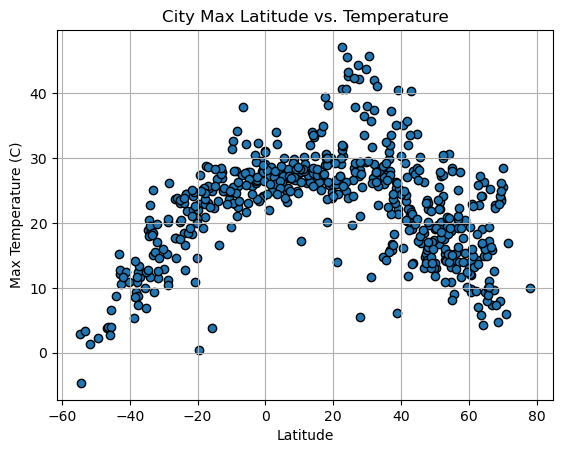

In [77]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

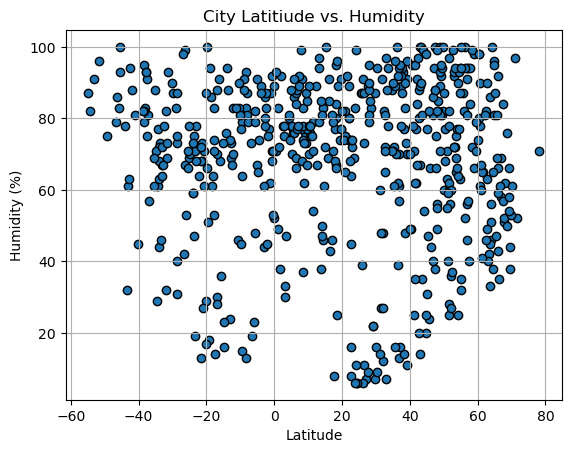

In [78]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitiude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

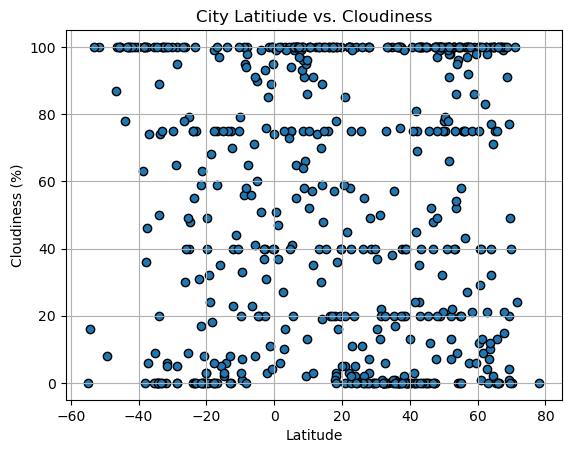

In [79]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitiude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

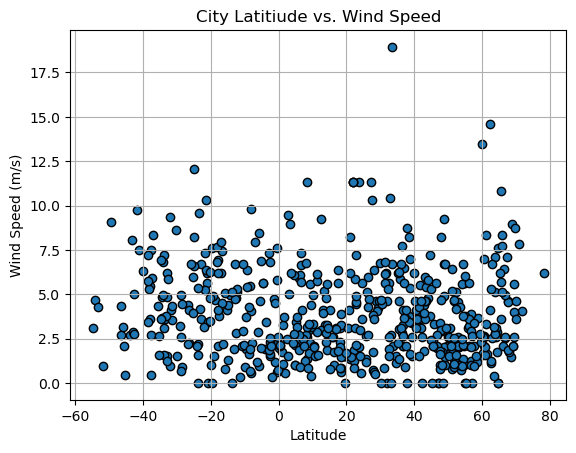

In [80]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitiude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [81]:
# Define a function to create Linear Regression plots
def plot_regression(x_values, y_values, x_label, y_label, x_text, y_text):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    eq_str = f"y = {slope:.2f}x "
    if intercept < 0:
        intercept *= -1
        eq_str += f" - {intercept:.2f}"
    elif intercept > 0:
        eq_str += f" + {intercept:.2f}"
    regress_values = slope * x_values + intercept
    print(f"The r-value is {rvalue}")
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.text(x_text, y_text, eq_str, color="red", fontsize="x-large")

In [82]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,aasiaat,68.7098,-52.8699,4.68,76,91,1.46,GL,1691585650
2,olonkinbyen,70.9221,-8.7187,5.93,97,100,7.84,SJ,1691585650
4,arkhangel'sk,64.5401,40.5433,26.26,38,2,2.89,RU,1691585650
6,hawaiian paradise park,19.5933,-154.9731,24.73,91,100,0.00,US,1691585356
7,sisimiut,66.9395,-53.6735,7.40,69,100,2.52,GL,1691585650


In [83]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,24.19,92,100,2.24,EC,1691585649
3,edinburgh of the seven seas,-37.0676,-12.3116,11.74,57,74,8.35,SH,1691585650
5,bredasdorp,-34.5322,20.0403,18.99,61,0,4.83,ZA,1691585569
8,sesheke,-17.4759,24.2968,28.74,14,0,3.79,ZM,1691585650
9,waitangi,-43.9535,-176.5597,8.79,78,78,2.68,NZ,1691585650


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.5717217319624125


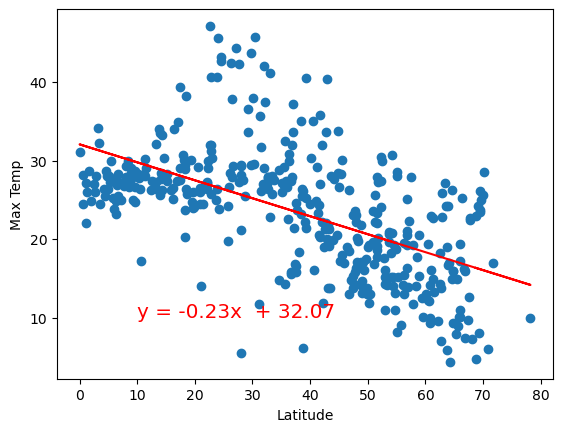

In [84]:
# Linear regression on Northern Hemisphere
plot_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", 10, 10)

The r-value is 0.826630143445916


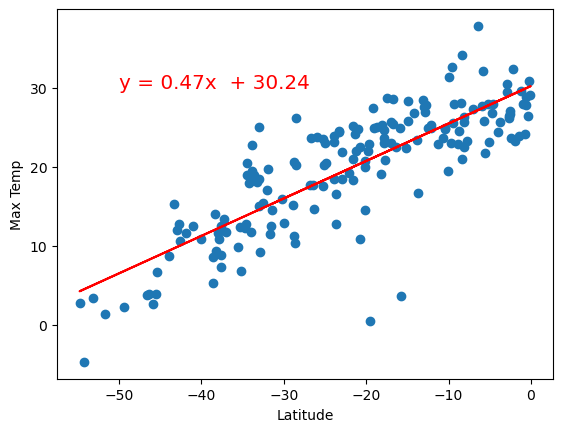

In [85]:
# Linear regression on Southern Hemisphere
plot_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", -50, 30)

**Discussion about the linear relationship:** The r-values for both of these plots are significant, and we can see that in both graphs, as we get close to 0 latitude, the temperature rises, which makes sense, because as we get closer to the equator (0 latitiude), the temperature rises.

### Humidity vs. Latitude Linear Regression Plot

The r-value is -0.043739827009172644


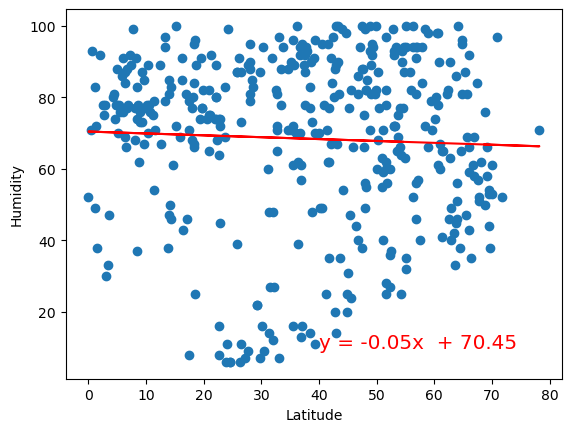

In [86]:
# Northern Hemisphere
plot_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", 40, 10)

The r-value is -0.11885413489895666


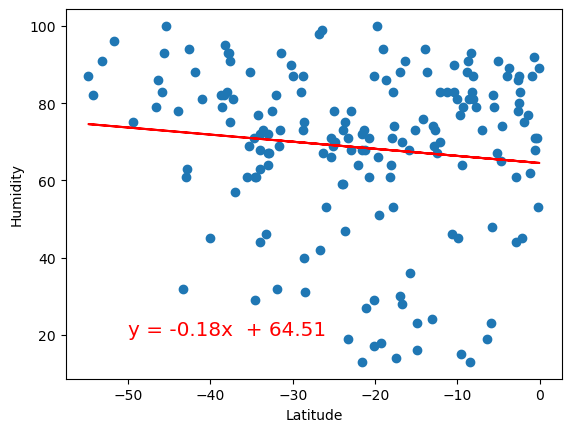

In [87]:
# Southern Hemisphere
plot_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", -50, 20)

**Discussion about the linear relationship:** With these graphs, we can see that there is very little linear correlation between humidity and latitude. This makes sense, as there are other factors like perhaps percipitation that may affect humidity, and latitude is not a good measure of these factors.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.03266775196249436


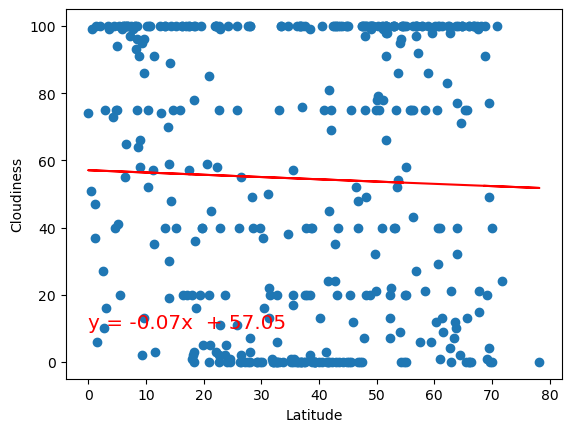

In [88]:
# Northern Hemisphere
plot_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", 0, 10)

The r-value is -0.12713749687632825


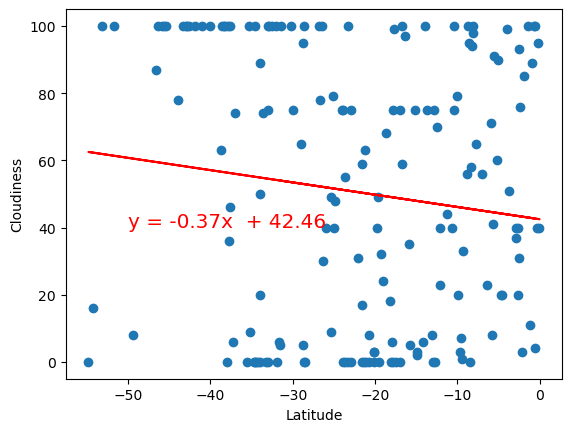

In [89]:
# Southern Hemisphere
plot_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", -50, 40)

**Discussion about the linear relationship:** There is very little linear correlation between cloudiness and latitude shown from these graphs. This makes sense as latitude doesn't generally determine how cloudy a city would be.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.013273284375487327


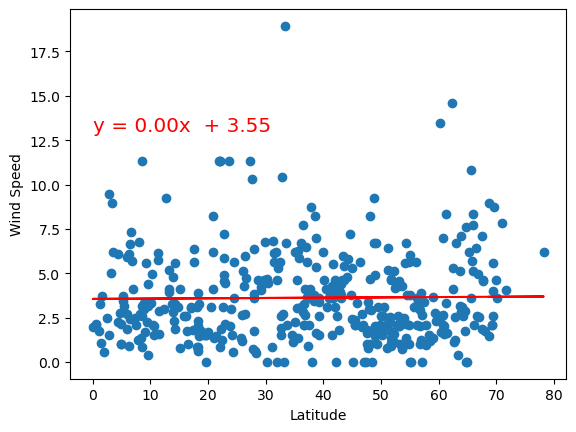

In [90]:
# Northern Hemisphere
plot_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", 0, 13)

The r-value is -0.12209627133166931


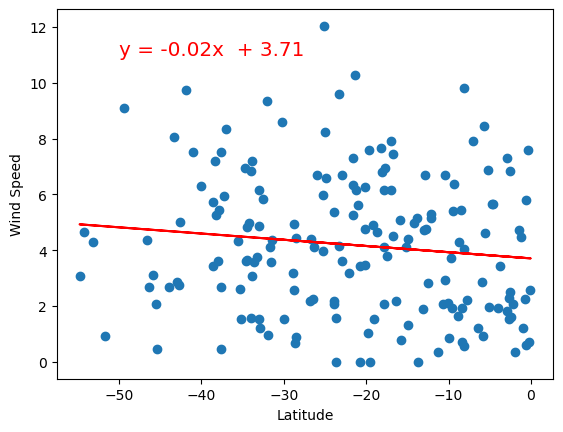

In [91]:
# Southern Hemisphere
plot_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", -50, 11)

**Discussion about the linear relationship:** There is very little linear correlation between wind speed and latitude. Both of these graphs show that no matter how far north or south of the equator you are, there is no major difference in wind speed.